# [Movielens full dataset EDA](https://grouplens.org/datasets/movielens/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
movies_raw = pd.read_csv('./data/movies_big.csv', dtype={'movieId': 'int32', 'title': 'str'})
ratings_raw = pd.read_csv('./data/ratings_big.csv', dtype={'userId': 'int32', 'movieId': 'int32', 'rating':'float16', 'timestamp': 'int32'})
ratings_raw.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [81]:
ratings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 423.5 MB


## b)

In [16]:
ratings_raw['movieId'].value_counts()[:10]

318     97999
356     97040
296     92406
593     87899
2571    84545
260     81815
480     76451
527     71516
110     68803
1       68469
Name: movieId, dtype: int64

In [20]:
movies_raw.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [48]:
movieId_with_most_ratings = ratings_raw['movieId'].value_counts()[:10].rename('number_of_ratings')
movieId_with_most_ratings

318     97999
356     97040
296     92406
593     87899
2571    84545
260     81815
480     76451
527     71516
110     68803
1       68469
Name: number_of_ratings, dtype: int64

In [83]:
movies_raw.query(f"movieId == {list(movieId_with_most_ratings.index)}").set_index(
    "movieId"
).join(movieId_with_most_ratings).sort_values(
    "number_of_ratings", ascending=False
).reset_index()

,movieId,title,genres,number_of_ratings
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,97999
1,356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,87899
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,84545
5,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,81815
6,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,76451
7,527,Schindler's List (1993),Drama|War,71516
8,110,Braveheart (1995),Action|Drama|War,68803
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469


## c)

In [62]:
ratings_raw.query(f'movieId == {list(movieId_with_most_ratings.index)}')['rating'].mean()

4.102288186731129

## d)

In [197]:
import re
def return_year(title):
    try:
        return re.findall("(\d{4})", title)[0]
    except:
        return None

movies_with_year = movies_raw.join(
    movies_raw["title"]
    .apply(lambda title: return_year(title))
    .rename("year")
    .dropna()
    .astype('int16')
).query('year > 1800 & year < 2022')

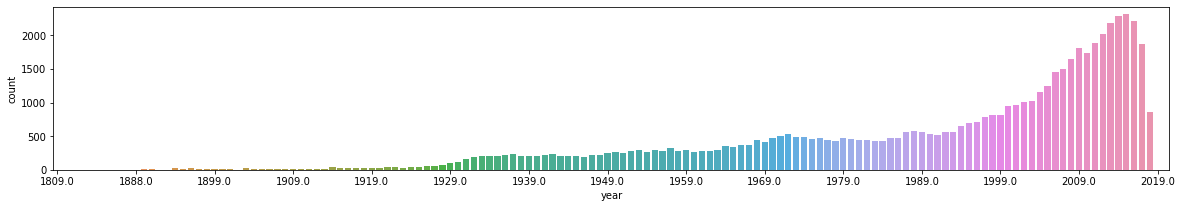

In [180]:
import matplotlib.ticker as ticker
plt.figure(figsize=[20, 3])
ax = sns.countplot(x='year', data=movies_with_year)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))